In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [13]:
df = pd.read_csv("/Users/pranavprajapati/Downloads/zillow-prize-1/cleaned_2016.csv")

/Users/pranavprajapati/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df.isnull().sum()

parcelid                           0
logerror                           0
airconditioningtypeid              0
architecturalstyletypeid           0
basementsqft                       0
bathroomcnt                        0
bedroomcnt                         0
buildingclasstypeid                0
buildingqualitytypeid              0
calculatedbathnbr                  0
finishedfloor1squarefeet           0
calculatedfinishedsquarefeet       0
finishedsquarefeet12               0
finishedsquarefeet13               0
finishedsquarefeet15               0
finishedsquarefeet50               0
finishedsquarefeet6                0
fips                               0
fireplacecnt                       0
fullbathcnt                        0
garagecarcnt                       0
garagetotalsqft                    0
hashottuborspa                     0
heatingorsystemtypeid              0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
p

In [8]:
train_y = df['taxvaluedollarcnt'].values


In [9]:
df = df.drop(['parcelid', 'logerror', 'propertyzoningdesc', 'propertycountylandusecode','taxvaluedollarcnt'], axis=1)
feat_names = df.columns.values



In [10]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(list(df[c].values))



In [11]:

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(df, train_y, feature_names=df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)



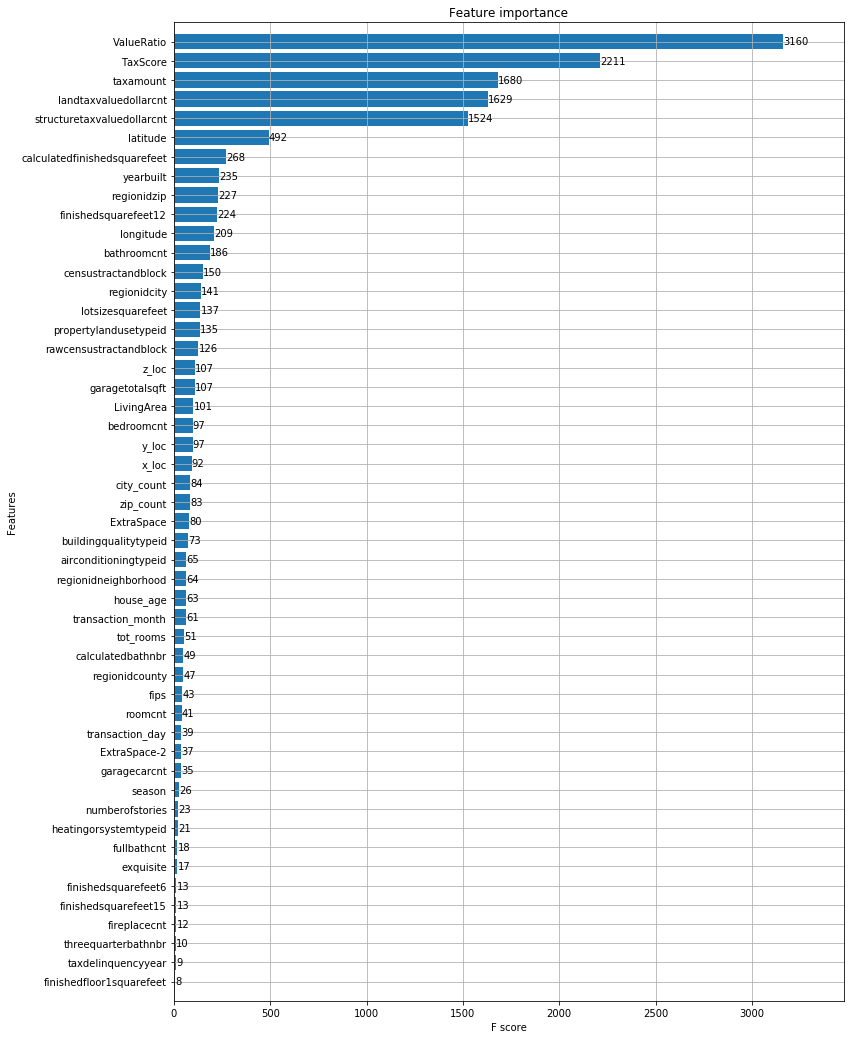

In [12]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [72]:
df['calculatedfinishedsquarefeet'].head()

0    1684.0
1    2263.0
2    2217.0
3     839.0
4    2283.0
Name: calculatedfinishedsquarefeet, dtype: float64

In [78]:
df['y_loc'].head()

0   -0.955745
1   -0.169663
2   -0.012196
3    0.766207
4    0.215376
Name: y_loc, dtype: float64

In [79]:
train_y

array([ 0.0276, -0.1684, -0.004 , ..., -0.2679,  0.0602,  0.4207])